# Going down to the cellular level: Indices

So far we learned how to retrieve a column, now we can learn how to do that for a row. Remember that, if formatted according to conventions, a row represents a single observation. A single observation, we have seen, may be described in terms of many attributes. Each cell in that row encodes the value for the corresponding column's attribute.

How can we refer to rows? Unsurprisingly, rows are numbered, or as it's called: *indexed*. **It is a quirk in computing that row numbers start with 0, not 1.** The first element in a list, for example, is list\[0\], not list\[1\], and if you wish to access the second-to-last element we can use negative indices, like list\[-1\]. 

You can also refer to a range of integers - for example, all those between 0 *inclusive* and *excluding* 18 - by using a colon such as *0:18*.


| Attribute0        | Attribute1           | Attribute2  |
| ------------- |:-------------:| -----:|
| Row 0, Column 0      | Row 0, Column 1 | Row 0, Column 2 |
| Row 1, Column 0      | Row 1, Column 1      |   Row 1, Column 2 |
| Row 2, Coumn 0 | Row 2, Coumn 1 |   Row 2, Column 2 |
 

The indices of a dataframe are stored as an object property and can be found by attaching *.index* to the dataframe variable. It's quite useful for learning about the dataframe's dimensions so you never try to access an element beyond that range. For example, if you try accessing the 7th element in a six-row dataframe, it will return the error *Index Error: list index out of range*.

To select rows, we ultimately need to make use of panda functions. One option is to use **iloc[]** that uses integer positions to choose rows, as just discussed. For a single row, it neatly formats the attribute name to right and value to the right:

In [15]:
import numpy as np
import pandas as pd
df = pd.read_csv("traffic_data_glasgow.csv", sep=',')

print (df.iloc[0]) #prints first row

Year                       2000
Count points                118
Pedal Cycles               1829
Motorcycles                4197
Cars                     935727
Buses and Coaches         19197
Light Goods Vehicles     120022
All HGVs                  72182
All Motor Vehicles      1152324
Name: 0, dtype: int64



Now let's try the same thing for the range 0:2.

### Before executing the code below, try predicting which rows will be printed out. The first row? The second? Both? And does the above format still work?


In [14]:
print (df.iloc[0:2])

   Year  Count points  Pedal Cycles  Motorcycles    Cars  Buses and Coaches  \
0  2000           118          1829         4197  935727              19197   
1  2001           118          1976         4495  950044              19698   

   Light Goods Vehicles  All HGVs  All Motor Vehicles  
0                120022     72182             1152324  
1                125213     71345             1170794  


Alternatively the function **loc[]** retrieves rows based on labels for rows and/or columns. For example, df.loc[0:1]

In [16]:

print (df.loc[0:1])

   Year  Count points  Pedal Cycles  Motorcycles    Cars  Buses and Coaches  \
0  2000           118          1829         4197  935727              19197   
1  2001           118          1976         4495  950044              19698   

   Light Goods Vehicles  All HGVs  All Motor Vehicles  
0                120022     72182             1152324  
1                125213     71345             1170794  


Dealing with row numbers feels a bit inconvenient however. It would be more natural to refer to rows using any unique identifier attribute, such as ID or Year. That way we could get all the rows encoding data between 2007 and 2010 without having to convert between row numbers and years.


In [3]:
#set the index to be equal to the year column
df = df.set_index('Year')
print (df.head())

      Count points  Pedal Cycles  Motorcycles     Cars  Buses and Coaches  \
Year                                                                        
2000           118          1829         4197   935727              19197   
2001           118          1976         4495   950044              19698   
2002           118          2007         4771   975271              20767   
2003           118          2141         5648   963936              19331   
2004           118          1715         4354  1006914              16296   

      Light Goods Vehicles  All HGVs  All Motor Vehicles  
Year                                                      
2000                120022     72182             1152324  
2001                125213     71345             1170794  
2002                127144     70991             1198946  
2003                133488     71984             1194387  
2004                141136     78108             1246808  




### Get rows between 2010 and 2012 (including 2012)
### In addition, to getting the entries between 2010 and 2012, include only the columns from Pedal Cycles to Cars
### Find the min number of motorcyles between 2000 and 2005 (Hint: you should get 4174 as a min number of motorcycles between 2000 and 2005)

In [4]:
# entries between 2010 and 2012
print (df.FUNCTION[row_range])

#entries between 2010 and 2012
print (df.FUNCTION[row_range,column_range])

#min temperature for 2000
print (df.loc[row_range, column].FUNCTION)

AttributeError: 'DataFrame' object has no attribute 'FUNCTION'

# Ignoring the irrelevant: filters
In our analysis often it's useful to know which entries satisfy a condition. For example, we might want to only look at dates with more than 120 count points. 

How to do that? Between the square brackets we need to put an expression that shows the condition that the value in the cell must satisfy. This is done using the logical operators == (equal to), <, >, =<, => and != (not equal to).

Whenever you code an expression like **df['Count points']>120**, this returns a list of TRUE/FALSE values, one value for each element in that column. As you can imagine, it is TRUE if the condition is satisfied, and FALSE if it isn't. 

Once we have this list, we can use it as a specifications for what indices we wish to return. TRUE becomes "include this", FALSE "ignore this". For example:

In [ ]:
below120 = df['Count points'] > 120

dfCounting = df[below120]

print (dfCounting.head())

### Retrieve the entries for which the count points are exactly 118
### Retrieve the entries for which the number of motorcycles is less than 4400

Use the template below, if you wish. To spice it up, the "getting the TRUE/FALSE list" step is combined with the "filter the rows" step.

In [6]:
#retrieveing entries with exactly 118 count points
dfPoints = df[df[COLUMN_NAME]CONDITION]

#entries with less than 4400 motorcycles counted
dfMotorcycles = ...

print(dfPoints.head())

SyntaxError: invalid syntax (<ipython-input-6-6197d464da63>, line 2)

# Time to visualise: Linegraphs

It is hard, if not impossible, to make a sensible visualisation out of data from 10 different attributes, so as we begin to visualise it, we initially settle for two. For now, let's settle for Cars and Year. 

The traffic data per year is a **time series** where data points are indexed **at equally spaced intervals**. Line charts are often the most common way of visualising time series. You have probably seen them in the news or in a PowerPoint presentation, with time at the X-axis and some changing quantity at the Y-axis. They are pervasive since humans are interested in understanding the past and using it to to predict the future.

### Why should you only make a linegraph for time series data and not, for example, height and width?

### Should you do linegraphs for whenever we study time as one variable? For example, if we study the relationship between physical exercise and sleep duration, is a linegraph appropriate?


In [19]:
#X axis: plotting the time range
x = df.index
y = df['Cars']

# Not as tricky as it looks like: Making graphs in Matplotlib 

To do this we must first import a library specialised for making plots, called **matplotlib.pyplot**. We use the library by first giving it a shorter alias. The exact syntax for how to string a line graph together can be overwhelming at first, but easy enough to tweak.

* **Extract the data:** begin by saving the X elements and Y elements into lists.
* **Set the stage for a plot:** To communicate the fact that you wish to plot these datasets as the X and Y axis, use the library's **plot** function, which does linegraphs. This won't immediately produce the plot, just sets the stage.
* **Adjust options:** Before producing the plot, we have the opportunity to adjust things like axis labels and legends. We do this by again calling library functions, which will apply them to the plot we are preparing. To learn more about these, you can sefe the documentation online https://matplotlib.org/3.0.0/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot.
* **Produce the graph:** To make the graph appear, we write **plt.show()**. 


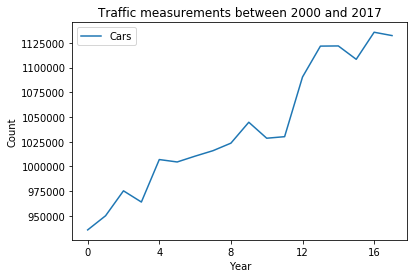

In [20]:

import matplotlib.pyplot as plt #will use it to create charts


#Set the stage for a plot
plt.plot(x,y,label='Cars')



#Adjust options
plt.title("Traffic measurements between 2000 and 2017")
plt.xlabel('Year')
plt.ylabel("Count")
plt.legend(loc='upper left')
plt.xticks(np.arange(min(df.index), max(df.index)+1, 4))

#Produce the graph
plt.show()


### Interpret the graph above. What has the trend been for the last 17 years in the number of cars? Is the change as dramatic as it seems or does the axes risk exaggerate it?

### Create a line chart for 2 fields of your choice. You can also select a year range if you prefer.

In [1]:
#X axis: plotting the time range
x = df.index
# y: number of vehicles
y = df[COLUMN NAME]
y1 = df[COLUMN NAME]
plt.plot(x,y, label= SENSIBLE LEGEND LABEL)
plt.plot(x,y1,label= SENSIBLE LEGEND LABEL)
plt.xticks(np.arange(min(df.index), max(df.index)+1, 4))

#code to set title and labels (see previous example)
plt.title(...)
plt.
...
plt.show()

SyntaxError: invalid syntax (<ipython-input-1-c81cbc29ba9e>, line 4)